# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = df["Mouse ID"].unique()
print(len(number_of_mice))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = df[df.duplicated(subset=['Mouse ID','Timepoint'])]["Mouse ID"].unique()

df = df[df["Mouse ID"] != "g989"]
len(df["Mouse ID"].unique())

248

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#I did this above


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = df["Mouse ID"].unique()
print(len(number_of_mice))
#there were previously 249 unique mice, now there are 250 since I changed the duplicate's name.

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats_basic = df.describe()["Tumor Volume (mm3)"]
stats_basic["sem"] = st.sem(df["Tumor Volume (mm3)"])
stats_basic["var"] = np.std(df["Tumor Volume (mm3)"])**2
stats_basic_df = pd.DataFrame(stats_basic)
stats_basic_df = stats_basic_df.drop(["count","min","25%","75%","max"])
stats_basic_df = stats_basic_df.transpose()
stats_basic_df = stats_basic_df.rename({"Tumor Volume (mm3)":"All Drugs"})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats_drug = df.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"]
stats_drug_df = pd.DataFrame(stats_drug)
stats_drug_df["sem"] = df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
stats_drug_df["var"] = stats_drug_df["std"]**2
stats_drug_df = stats_drug_df.drop(columns =["count","25%","75%","min","max"])
total_df = pd.concat([stats_drug_df,stats_basic_df])

total_df

C:\Users\15037\AppData\Local\Temp\ipykernel_24132\246677568.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats_drug_df["sem"] = df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


,mean,std,50%,sem,var
Capomulin,40.675741,4.994774,41.557809,0.329346,24.947764
Ceftamin,52.591172,6.268188,51.776157,0.469821,39.290177
Infubinol,52.884795,6.567243,51.820584,0.492236,43.128684
Ketapril,55.235638,8.279709,53.698743,0.603860,68.553577
Naftisol,54.331565,8.134708,52.509285,0.596466,66.173479
Placebo,54.033581,7.821003,52.288934,0.581331,61.168083
Propriva,52.320930,6.622085,50.446266,0.544332,43.852013
Ramicane,40.216745,4.846308,40.673236,0.320955,23.486704
Stelasyn,54.233149,7.710419,52.431737,0.573111,59.450562
Zoniferol,53.236507,6.966589,51.818479,0.516398,48.533355


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
total_agg_stats = df.agg(["mean","median","std","sem","var"])["Tumor Volume (mm3)"]
agg_stats_df = df.groupby("Drug Regimen").agg(["mean","median","std","sem","var"])["Tumor Volume (mm3)"]
total_agg_stats_df = pd.DataFrame(total_agg_stats).transpose()
total_agg_stats_df
final_stats_df = pd.concat([agg_stats_df,total_agg_stats_df])
final_stats_df.rename({"Tumor Volume (mm3)":"All Drugs"})

C:\Users\15037\AppData\Local\Temp\ipykernel_24132\2792648008.py:5: FutureWarning: ['Mouse ID', 'Drug Regimen', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  total_agg_stats = df.agg(["mean","median","std","sem","var"])["Tumor Volume (mm3)"]
C:\Users\15037\AppData\Local\Temp\ipykernel_24132\2792648008.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_stats_df = df.groupby("Drug Regimen").agg(["mean","median","std","sem","var"])["Tumor Volume (mm3)"]


,mean,median,std,sem,var
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.320930,50.446266,6.622085,0.544332,43.852013
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562
Zoniferol,53.236507,51.818479,6.966589,0.516398,48.533355


## Bar and Pie Charts

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


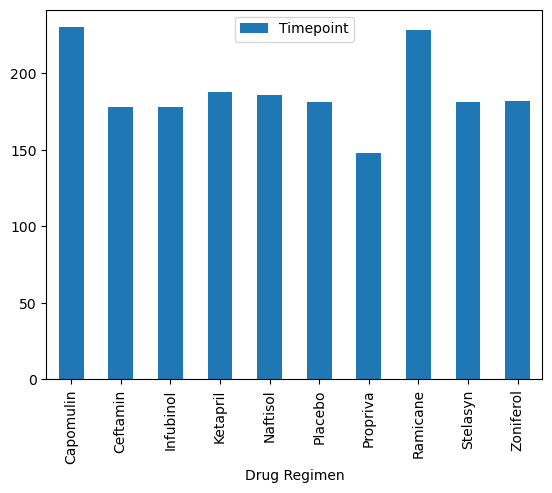

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_pds_df = df.groupby("Drug Regimen").count()
bar_pds_df.plot.bar(y = "Timepoint")
bar_pds_df.head()

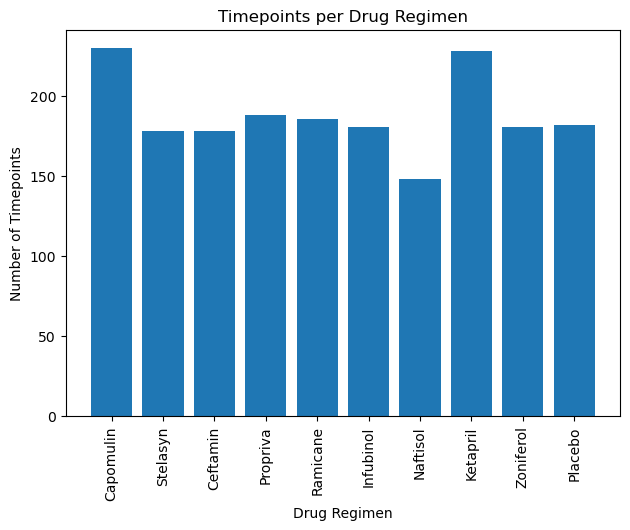

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = list(set(df["Drug Regimen"]))
plt.bar(x,bar_pds_df["Timepoint"])
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.tight_layout()
plt.xticks(rotation = "vertical")
plt.show()

<Axes: ylabel='Mouse ID'>

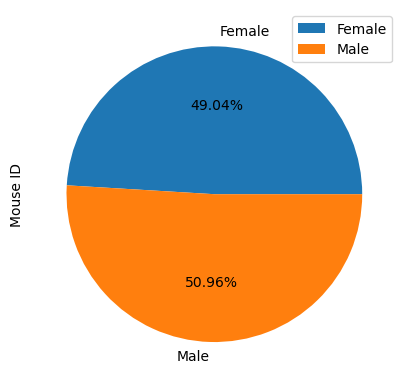

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = df.groupby("Sex").count()

sex_count.plot.pie(y = "Mouse ID",autopct = "%0.2f%%")


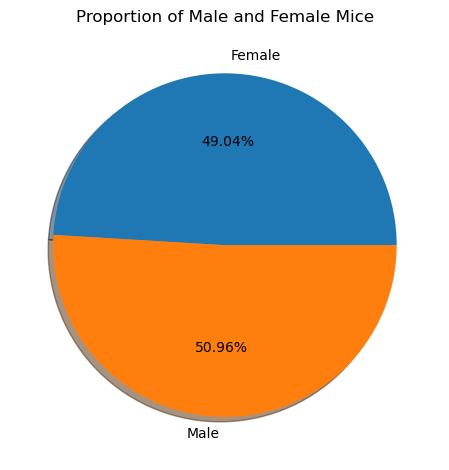

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y = list(set(df["Sex"]))
sex_count2 = df.groupby("Sex").count()
plt.pie(sex_count2["Mouse ID"],labels=y, shadow=True,autopct="%0.2f%%")
plt.title("Proportion of Male and Female Mice")
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs_df = df[(df["Drug Regimen"] == "Capomulin") | (df["Drug Regimen"] == "Ramicane") | (df["Drug Regimen"] == "Infubinol") | (df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse

final_test_df = df.groupby("Mouse ID").max("Timepoints").reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

temp_data_df = pd.merge(df,final_test_df,how="inner",on=["Mouse ID","Timepoint"])
temp_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,21,16,45.000000,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,3,17,45.000000,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,16,15,45.473753,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,22,17,45.000000,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,11,16,45.851531,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

big_four = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cycle_list = []
q1 = []
median = []
q3 = []
iqr = []
upper = []
lower = []
outlier_indecies = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in big_four:
    
    # Locate the rows which contain mice on each drug and get the tumor volume

    drug_data = temp_data_df[temp_data_df["Drug Regimen"] == drug]
    
    # add subset 
    
    cycle_list.append(drug_data["Tumor Volume (mm3)_x"])
    quartiles = drug_data["Tumor Volume (mm3)_x"].quantile([.25,.5,.75])
    q1.append(quartiles[.25])
    median.append(quartiles[.5])
    q3.append(quartiles[.75])
    inner = quartiles[.75] - quartiles[.25]
    iqr.append(inner)
    big = quartiles[.75] + 1.5*inner
    upper.append(big)
    small = quartiles[.25] - 1.5*inner
    lower.append(small)
    outliers = drug_data[(drug_data["Tumor Volume (mm3)_x"] < small) | (drug_data["Tumor Volume (mm3)_x"] > big)]
    outlier_indecies.append(outliers.index.tolist())
    # Determine outliers using upper and lower bounds
print(outlier_indecies)
print("We can see that there is one outlier with the index '74' and it's data for the mouse is the following:")
print(temp_data_df.iloc[74])



[[], [], [74], []]
We can see that there is one outlier with the index '74' and it's data for the mouse is the following:
Mouse ID                     c326
Drug Regimen            Infubinol
Sex                        Female
Age_months_x                   18
Weight (g)_x                   25
Timepoint                       5
Tumor Volume (mm3)_x    36.321346
Metastatic Sites_x              0
Age_months_y                   18
Weight (g)_y                   25
Tumor Volume (mm3)_y         45.0
Metastatic Sites_y              0
Name: 74, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

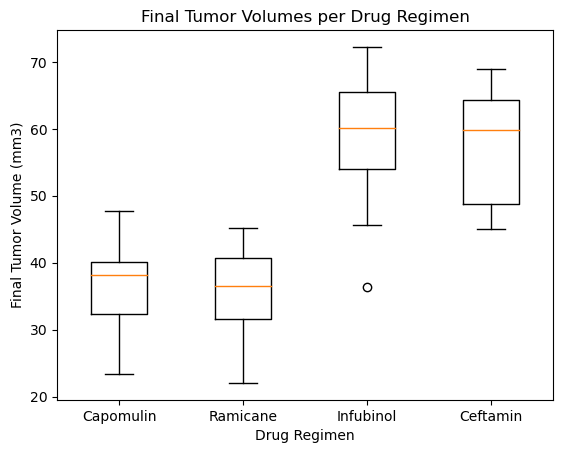

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(cycle_list,labels=big_four)
plt.title("Final Tumor Volumes per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.tight_layout
plt.show
   

## Line and Scatter Plots

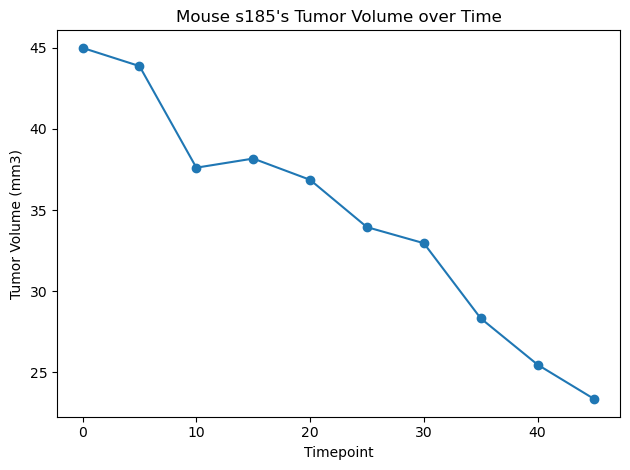

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = df[df["Drug Regimen"] == "Capomulin"]
single_mouse_df = capomulin_df[capomulin_df["Mouse ID"] == "s185"]
plt.plot(single_mouse_df["Timepoint"],single_mouse_df["Tumor Volume (mm3)"],marker = "o")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185's Tumor Volume over Time")
plt.tight_layout()
plt.show()

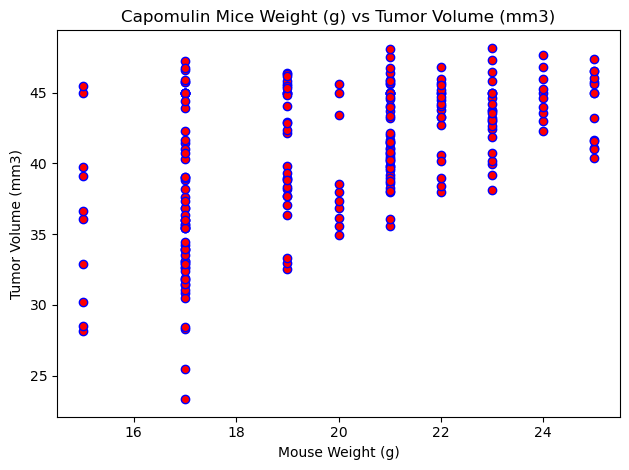

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"],marker= "o",color = "r", edgecolors="b")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mice Weight (g) vs Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Correlation and Regression

C:\Users\15037\AppData\Local\Temp\ipykernel_24132\1211667391.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_tumor_capomulin = capomulin_df.groupby("Mouse ID").mean()


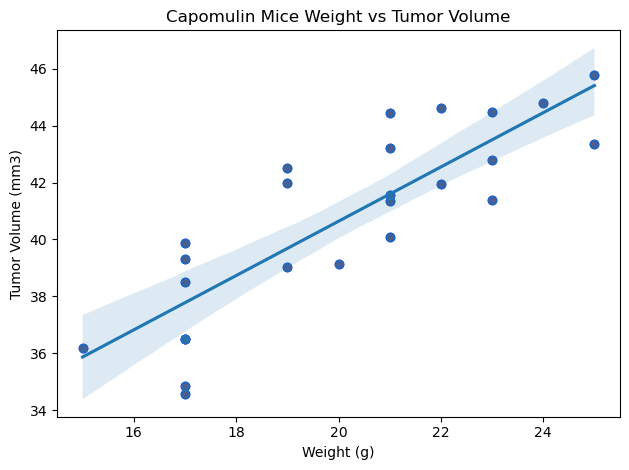

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_tumor_capomulin = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(average_tumor_capomulin["Weight (g)"],average_tumor_capomulin["Tumor Volume (mm3)"],marker = "o",color = "r",edgecolors="b")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mice Weight vs Tumor Volume")
plt.tight_layout()
sb.regplot(x = average_tumor_capomulin["Weight (g)"], y = average_tumor_capomulin["Tumor Volume (mm3)"])
plt.show()